# 🚀 머신러닝 실습 : 고객 구매 데이터로 성별 예측 모델링 (분류 문제)
- 주어진 데이터는 백화점 고객의 1년 간 구매 데이터입니다.
- 고객 3,500명에 대한 학습용 데이터(y.csv, X.csv)를 이용하여 성별예측 모형을 만들어보세요.
- 모델의 성능은 자유롭게 측정해봅니다!

## [실습 프로세스]
1. 데이터 불러오기
2. 데이터 탐색
3. 데이터 전처리
4. 학습/테스트 데이터 분리
5. 모델 선택 및 학습
6. 예측 및 평가

---

# 0. 라이브러리 불러오기
- 라이브러리를 가져와서 과정을 준비합니다

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

---

# 1. 데이터 불러오기
- 데이터를 가져와서 과정을 준비합시다.
- 인코딩 방식은 'euc-kr' 을 활용하세요.

- 데이터 출처 : 한국데이터산업진흥원 빅데이터분석기사 실기 공개 예시 문항

- 독립 변수 데이터셋 : X.csv

- 종속 변수 데이터셋 : y.csv

데이터 파일을 불러옵니다. 보통 CSV 파일을 pandas로 읽어옵니다.

In [2]:
X = pd.read_csv('X.csv', encoding='euc-kr')
y = pd.read_csv('y.csv', encoding='euc-kr')

---

# 2. 데이터 탐색하기
- 데이터를 이해할 수 있도록 탐색과정을 수행해봅시다.
- 데이터의 상위 몇 개 행을 출력하여 전체 구조를 미리 확인합니다.

- 데이터의 요약 정보나 통계 정보를 출력해 변수들의 유형과 분포를 확인합니다.


In [3]:
X_df = pd.DataFrame(X)
X_df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [4]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
y_df = pd.DataFrame(y)
y_df.head(3)

,cust_id,gender
0,0,0
1,1,0
2,2,1


In [6]:
y = y['gender']

---

# 3. 데이터 전처리
- 전처리 과정을 통해서 머신러닝에 사용할 수 있는 형태의 데이터 준비   

필요한 라이브러리를 불러옵니다.   

- 인코딩
- 데이터 표준화
- 단순히 1부터의 숫자를 부여한 'cust_id'를 수치형 변수로 받아들이면, 결과가 왜곡될 수 있으니 컬럼을 제거합니다.
- 데이터에 결측치가 있는지 확인해보세요
- 결측치에 0으로 채워 넣어 모델 학습에 지장이 없도록 합니다.
문자형 범주 데이터를 숫자로 바꾸기 위한 인코딩을 수행합니다.

각 데이터에 표준화를 적용하여 데이터의 스케일(크기 차이)을 맞춰줍니다.

- 평균을 0, 표준편차를 1로 맞춰서 → 데이터가 정규 분포 형태로 변환되도록 하세요

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
X = X.drop(columns=['cust_id'])

In [9]:
X['환불금액'] = X['환불금액'].fillna(0)

In [10]:
X_original = X.copy()
X_ohe = pd.get_dummies(X_original[['주구매상품', '주구매지점']], drop_first=True)

In [11]:
X_dropped = X_original.drop(columns=['주구매상품', '주구매지점'])
X_encoded = pd.concat([X_dropped, X_ohe], axis=1)

X['상품_freq'] = X['주구매상품'].map(X['주구매상품'].value_counts())
X['지점_freq'] = X['주구매지점'].map(X['주구매지점'].value_counts())
X.drop(columns=['주구매상품', '주구매지점'], inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

---

# 5-1. 모델링 - LogisticRegression
- 본격적으로 모델을 선언하고 학습시킵니다.   

필요한 라이브러리를 불러옵니다.

모델을 선언하여 객체화시킵니다.

모델을 학습 데이터에 맞춰 학습시킵니다.

In [14]:
lr_clf = LogisticRegression(max_iter=100, random_state=42)
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

---

# 6-1. 예측 성능 확인해보기 - LogisticRegression
- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.
- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)


In [15]:
lr_pred = lr_clf.predict(X_test_scaled)
accuracy_score(y_test, lr_pred)

0.6257142857142857

---

# 5-2. 모델링 - DecisionTreeClassifier
- 본격적으로 모델을 선언하고 학습시킵니다.   

필요한 라이브러리를 불러옵니다.

모델을 선언하여 객체화시킵니다.

모델을 학습 데이터에 맞춰 학습시킵니다.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

Accuracy: 0.6228571428571429
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       427
           1       0.52      0.56      0.54       273

    accuracy                           0.62       700
   macro avg       0.61      0.61      0.61       700
weighted avg       0.63      0.62      0.63       700



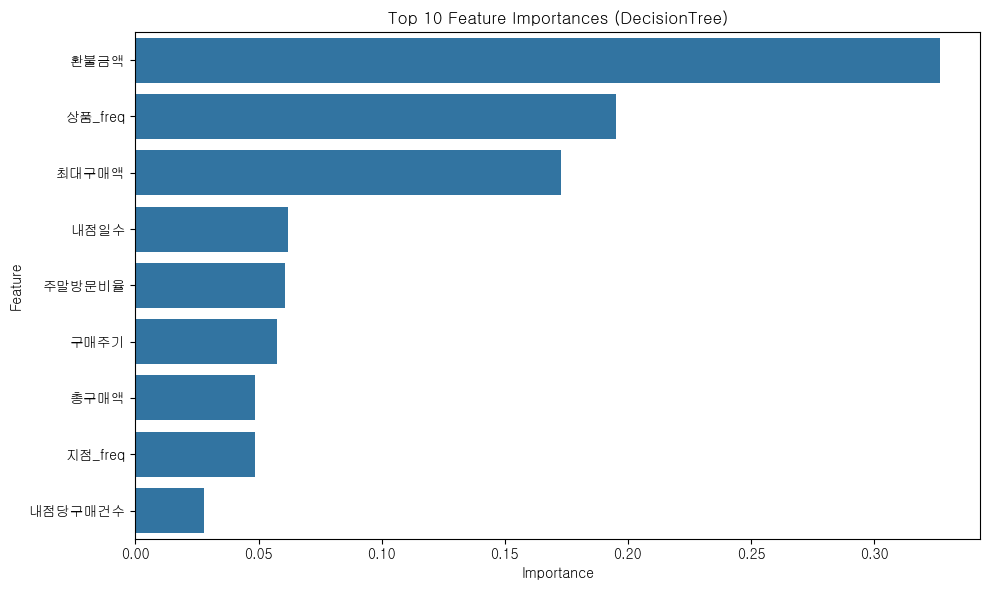

In [18]:
dt_clf = dt_clf1 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=7,
    random_state=42,
    class_weight='balanced'      
)
dt_clf.fit(X_train_scaled, y_train)
rf_pred = dt_clf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


importances = dt_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (DecisionTree)')
plt.tight_layout()
plt.show()

In [19]:
top_features = feature_importance_df.head(6)['Feature'].tolist()

X_top = X[top_features]

X_top_scaled = minmax_scaler.fit_transform(X_top)

X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

dt_top = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=7,
    random_state=42,
    class_weight='balanced'                 
)
dt_top.fit(X_train_top, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       min_samples_split=7, random_state=42)

---

# 6-2. 예측 성능 확인해보기 - DecisionTreeClassifier
- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.
- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [20]:
y_pred_top = dt_top.predict(X_test_top)

print("Accuracy:", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       427
           1       0.52      0.56      0.54       273

    accuracy                           0.63       700
   macro avg       0.62      0.62      0.62       700
weighted avg       0.64      0.63      0.63       700



---

# 5-3. 모델링 - RandomForestClassifier
- 본격적으로 모델을 선언하고 학습시킵니다.   

필요한 라이브러리를 불러옵니다.

모델을 선언하여 객체화시킵니다.

모델을 학습 데이터에 맞춰 학습시킵니다.

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       427
           1       0.53      0.62      0.57       273

    accuracy                           0.64       700
   macro avg       0.63      0.64      0.63       700
weighted avg       0.65      0.64      0.64       700



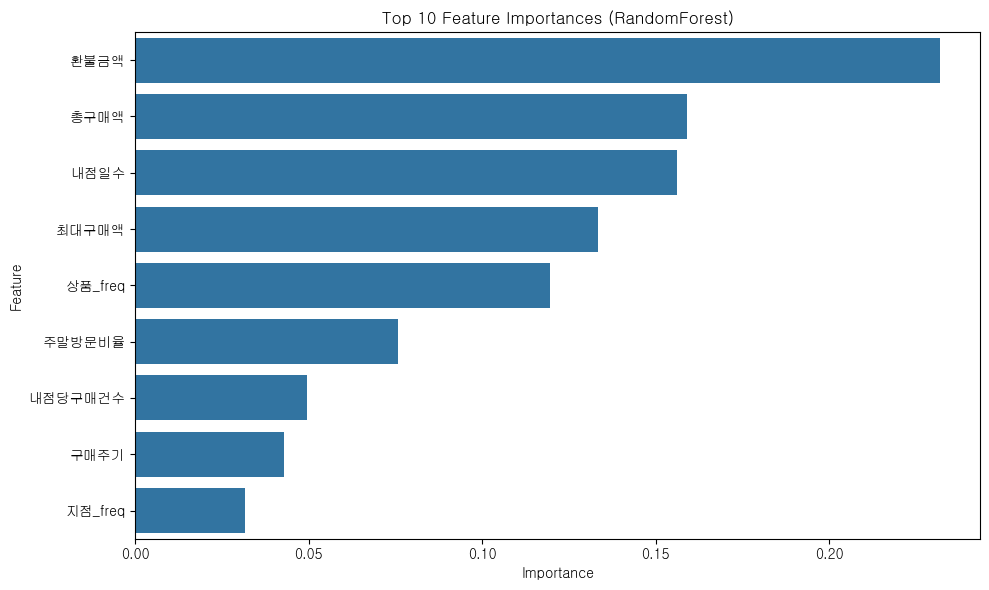

In [21]:
rf_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=4,
    min_samples_split=3,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'   
    )
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (RandomForest)')
plt.tight_layout()
plt.show()

In [22]:
top_features = feature_importance_df.head(7)['Feature'].tolist()

X_top = X[top_features]

X_top_scaled = minmax_scaler.fit_transform(X_top)

X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

rf_top = RandomForestClassifier(
    n_estimators=600,
    max_depth=4,
    min_samples_split=3,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'                         
)
rf_top.fit(X_train_top, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4,
                       min_samples_split=3, n_estimators=600, random_state=42)

---

# 6-3. 예측 성능 확인해보기 - RandomForestClassifier
- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.
- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [23]:
y_pred_top = rf_top.predict(X_test_top)

print("Accuracy:", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

Accuracy: 0.6471428571428571
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       427
           1       0.54      0.62      0.58       273

    accuracy                           0.65       700
   macro avg       0.64      0.64      0.64       700
weighted avg       0.66      0.65      0.65       700



---

# 5-4. 모델링 - XGBoost
- 본격적으로 모델을 선언하고 학습시킵니다.   

필요한 라이브러리를 불러옵니다.

모델을 선언하여 객체화시킵니다.

모델을 학습 데이터에 맞춰 학습시킵니다.

In [24]:
X = pd.read_csv('X.csv', encoding='euc-kr')
y = pd.read_csv('y.csv', encoding='euc-kr')

X.drop(columns=['cust_id'], inplace=True)
y = y['gender']

X['환불금액'] = X['환불금액'].fillna(X['환불금액'].mean())


X_original = X.copy()
X_ohe = pd.get_dummies(X_original[['주구매상품', '주구매지점']], drop_first=True)

X_dropped = X_original.drop(columns=['주구매상품', '주구매지점'])
X_encoded = pd.concat([X_dropped, X_ohe], axis=1)

X['상품_freq'] = X['주구매상품'].map(X['주구매상품'].value_counts())
X['지점_freq'] = X['주구매지점'].map(X['주구매지점'].value_counts())
X.drop(columns=['주구매상품', '주구매지점'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

s_scaler = MinMaxScaler()
X_train_scaled = s_scaler.fit_transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

In [25]:
from xgboost import XGBClassifier

[0]	validation_0-logloss:0.69205
[1]	validation_0-logloss:0.69094
[2]	validation_0-logloss:0.68993
[3]	validation_0-logloss:0.68898
[4]	validation_0-logloss:0.68810
[5]	validation_0-logloss:0.68715
[6]	validation_0-logloss:0.68608
[7]	validation_0-logloss:0.68527
[8]	validation_0-logloss:0.68426
[9]	validation_0-logloss:0.68331
[10]	validation_0-logloss:0.68246
[11]	validation_0-logloss:0.68156
[12]	validation_0-logloss:0.68074
[13]	validation_0-logloss:0.67980
[14]	validation_0-logloss:0.67892
[15]	validation_0-logloss:0.67804
[16]	validation_0-logloss:0.67718
[17]	validation_0-logloss:0.67643
[18]	validation_0-logloss:0.67570
[19]	validation_0-logloss:0.67482
[20]	validation_0-logloss:0.67400
[21]	validation_0-logloss:0.67321
[22]	validation_0-logloss:0.67245
[23]	validation_0-logloss:0.67171
[24]	validation_0-logloss:0.67098
[25]	validation_0-logloss:0.67025
[26]	validation_0-logloss:0.66952
[27]	validation_0-logloss:0.66880
[28]	validation_0-logloss:0.66818
[29]	validation_0-loglos

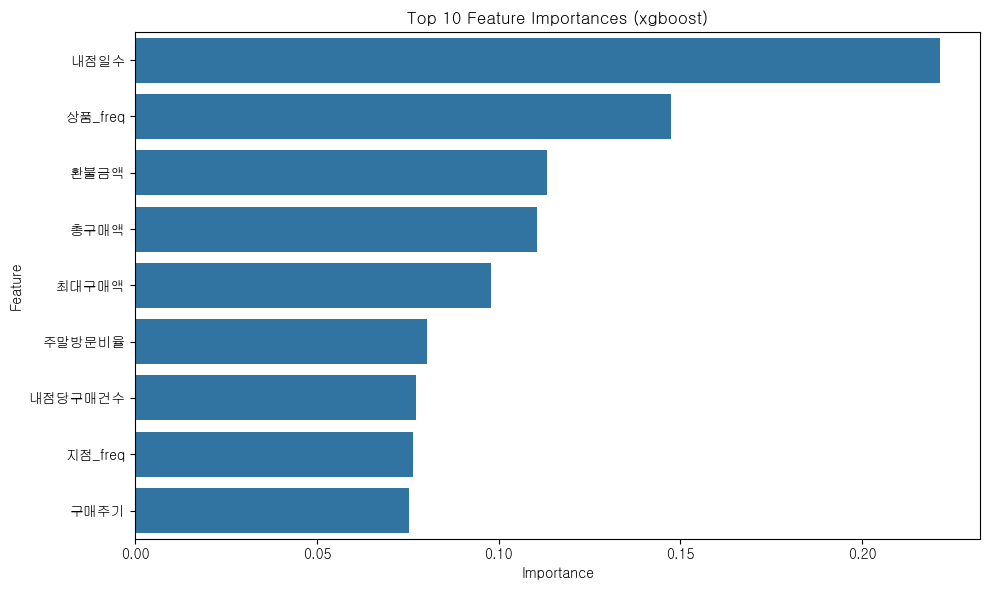

In [26]:
xgb =  XGBClassifier(
    n_estimators=900,
    learning_rate=0.008,
    max_depth=5,
    colsample_bytree=0.7,        
)
xgb.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric='logloss',
    early_stopping_rounds=40,
)
xgb_pred = xgb.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


importances = xgb.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (xgboost)')
plt.tight_layout()
plt.show()

In [27]:
top_features = feature_importance_df['Feature'].tolist()

X_top = X[top_features]

X_top_scaled = s_scaler.fit_transform(X_top)

X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

xgb_top =  XGBClassifier(
    n_estimators=900,
    learning_rate=0.008,
    max_depth=5,
    colsample_bytree=0.7,     

)
xgb_top.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric='logloss',
    early_stopping_rounds=40,
)

[0]	validation_0-logloss:0.69205
[1]	validation_0-logloss:0.69094
[2]	validation_0-logloss:0.68993
[3]	validation_0-logloss:0.68898
[4]	validation_0-logloss:0.68810
[5]	validation_0-logloss:0.68715
[6]	validation_0-logloss:0.68608
[7]	validation_0-logloss:0.68527
[8]	validation_0-logloss:0.68426
[9]	validation_0-logloss:0.68331
[10]	validation_0-logloss:0.68246
[11]	validation_0-logloss:0.68156
[12]	validation_0-logloss:0.68074
[13]	validation_0-logloss:0.67980
[14]	validation_0-logloss:0.67892
[15]	validation_0-logloss:0.67804
[16]	validation_0-logloss:0.67718
[17]	validation_0-logloss:0.67643
[18]	validation_0-logloss:0.67570
[19]	validation_0-logloss:0.67482
[20]	validation_0-logloss:0.67400
[21]	validation_0-logloss:0.67321
[22]	validation_0-logloss:0.67245
[23]	validation_0-logloss:0.67171
[24]	validation_0-logloss:0.67098
[25]	validation_0-logloss:0.67025
[26]	validation_0-logloss:0.66952
[27]	validation_0-logloss:0.66880
[28]	validation_0-logloss:0.66818
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.008, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=900,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---

# 6-4. 예측 성능 확인해보기 - XGBoost
- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.
- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [28]:
y_pred_top = xgb_top.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

Accuracy: 0.6542857142857142
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       427
           1       0.60      0.35      0.44       273

    accuracy                           0.65       700
   macro avg       0.63      0.60      0.60       700
weighted avg       0.64      0.65      0.63       700



---